In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question 5-a : Compute and plot the bias and variance of these subsets as a function of the number of
 samples. Interpret your findings.

In [2]:
# importing the dataset 

df = pd.read_csv("cardio.csv" , sep = ';')
df.head()

# print(df.columns)

# creating all possible combinations of percentages that can be sampled 

percentage_set = np.arange(0.1,100,0.1)
raw_number_count = percentage_set*(df.shape[0]/100)

#print(raw_number_count)


print("The orginal row count is " , df.shape[0])

pop_mean = np.mean(df['ap_hi'])
pop_variance = np.var(df['ap_hi'])

ap_hi_array = df['ap_hi'].values
 

print(pop_variance)

    



The orginal row count is  70000
23719.17847263265


Generating 100 samples of different sample sizes to find bias and variance of sample means

In [3]:
no_of_sample = 100 # we be generating 100 samples of each set with replacement


# storing bias and variance in a dictionary for every set

bias = {i: 0 for i in percentage_set}
variance = {i: 0 for i in percentage_set}
prob_abv_pop_mean = {i: 0 for i in percentage_set}
cheb_bound = {i: 0 for i in percentage_set}

k = 1

# random sample 

for i in percentage_set:
    sample_means = np.zeros(no_of_sample)
    diff_pop = np.zeros(no_of_sample)
    for j in range(no_of_sample):
        sample_indices = np.random.choice(len(ap_hi_array), size=int(len(ap_hi_array) * i / 100), replace=True)
        sample_means[j] = np.mean(ap_hi_array[sample_indices])
        diff_pop[j] = np.abs(np.mean(ap_hi_array[sample_indices]) - pop_mean)
            
    
    # variance of these samples with ddof=1
    variance[i] = np.var(sample_means, ddof=1)
    # prob of abs diff being greater than k
    prob_abv_pop_mean[i] = np.sum(diff_pop > 1)/100
    
    # the corr cheb bound 
    bound = pop_variance / (raw_number_count[int(i * 10 - 1)] * (k ** 2))
    cheb_bound[i] = bound

    # Bias of these samples
    bias[i] = np.mean(sample_means) - pop_mean

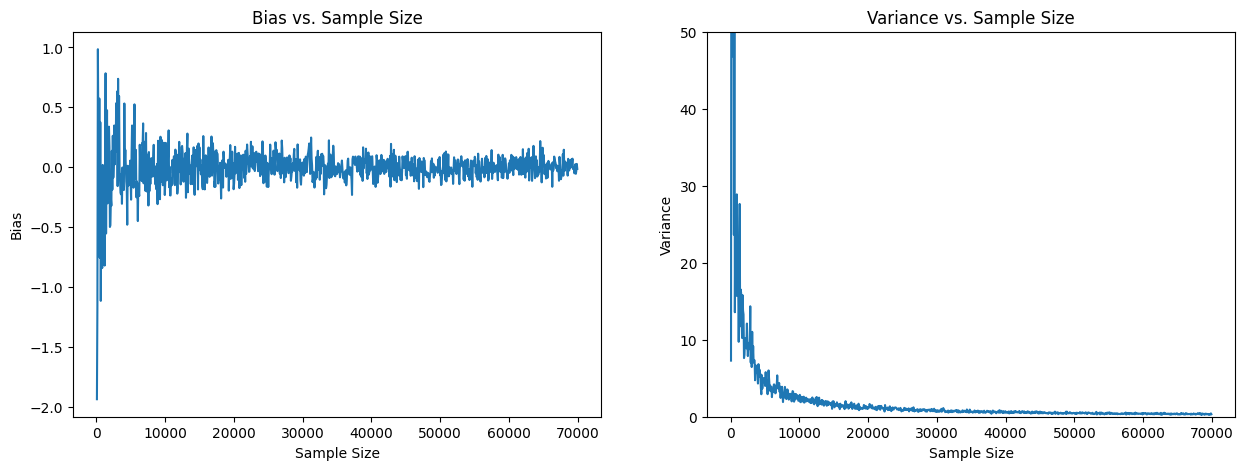

In [4]:
df_final = pd.DataFrame({
    'Sample_size': raw_number_count,
    'Bias': list(bias.values()),
    'Variance': list(variance.values()),
    'Prob_abv_epsilon' : list(prob_abv_pop_mean.values()),
    'Chebyshev_bound' : list(cheb_bound.values())
})


fig,axes = plt.subplots(1,2,figsize=(15,5))

# Plot using Seaborn
sns.lineplot(data=df_final, x='Sample_size', y='Bias',ax = axes[0])
axes[0].set_title('Bias vs. Sample Size')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Bias')

sns.lineplot(data=df_final, x='Sample_size', y='Variance',ax = axes[1])
axes[1].set_title('Variance vs. Sample Size')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Variance')
axes[1].set_ylim(0, 50)
plt.show()



Question 5-b : Approximate the probability that ap hi deviates from the corresponding population mean via Monte Carlo simulations, and compare it to the Chebyshev bound that we use to prove the law of large numbers.

In [19]:
size_of_samples = [10 , 100 , 1000 , 10000 , 20000 , 30000 , 40000]

no_of_sample = 10000 # we be generating 10000 samples of each set with replacement

prob_abv_pop_mean = {i: 0 for i in size_of_samples}
cheb_bound = {i: 0 for i in size_of_samples}

k = 1

# random sample 

for i in size_of_samples:
    diff_pop = np.zeros(no_of_sample)
    for j in range(no_of_sample):
        sample_indices = np.random.choice(len(ap_hi_array), size=i, replace=True)
        diff_pop[j] = np.abs(np.mean(ap_hi_array[sample_indices]) - pop_mean)
            
   
    # prob of abs diff being greater than k
    prob_abv_pop_mean[i] = np.sum(diff_pop > k)/no_of_sample
    
    # the corr cheb bound 
    bound = pop_variance / (i * (k ** 2))
    cheb_bound[i] = bound

C:\Users\abhin\AppData\Local\Temp\ipykernel_9220\1595524451.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,100])


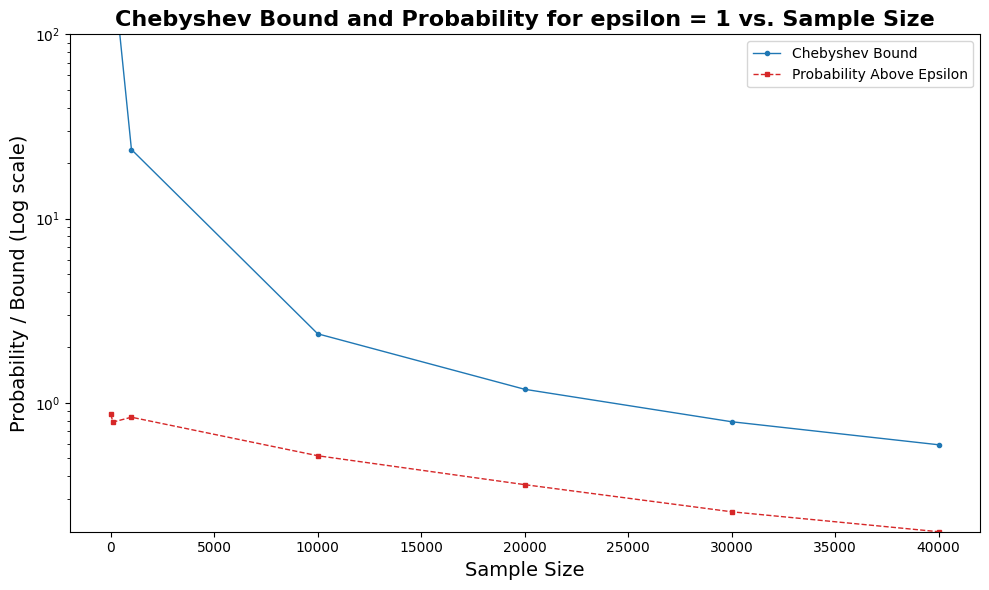

In [23]:
# Create the DataFrame
df_final_1 = pd.DataFrame({
    'Sample_size': size_of_samples,
    'Prob_abv_epsilon': list(prob_abv_pop_mean.values()),
    'Chebyshev_bound': list(cheb_bound.values())
})

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot Chebyshev Bound
plt.plot(df_final_1['Sample_size'], df_final_1['Chebyshev_bound'], marker='o', linestyle='-', color='tab:blue', linewidth=1, markersize=3, label='Chebyshev Bound')
plt.ylim(0,1)

# Plot Probability Above Epsilon
plt.plot(df_final_1['Sample_size'], df_final_1['Prob_abv_epsilon'], marker='s', linestyle='--', color='tab:red', linewidth=1, markersize=3, label='Probability Above Epsilon')



# adding log scale to smooth out 
plt.yscale('log')
plt.ylim([0,100])

# Add labels and title
plt.xlabel('Sample Size', fontsize=14)
plt.ylabel('Probability / Bound (Log scale)', fontsize=14)
plt.title(f'Chebyshev Bound and Probability for epsilon = {k} vs. Sample Size', fontsize=16, fontweight='bold')


# Add legend
plt.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()